In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [28]:
data=pd.read_csv("kc_house_data.csv")
df=pd.DataFrame(data=data)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [30]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


C:\Users\Rajesh\AppData\Local\Temp\ipykernel_13168\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

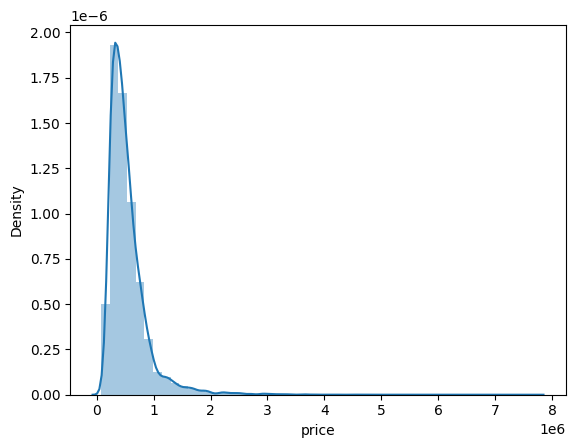

In [36]:
sns.distplot(df['price'])

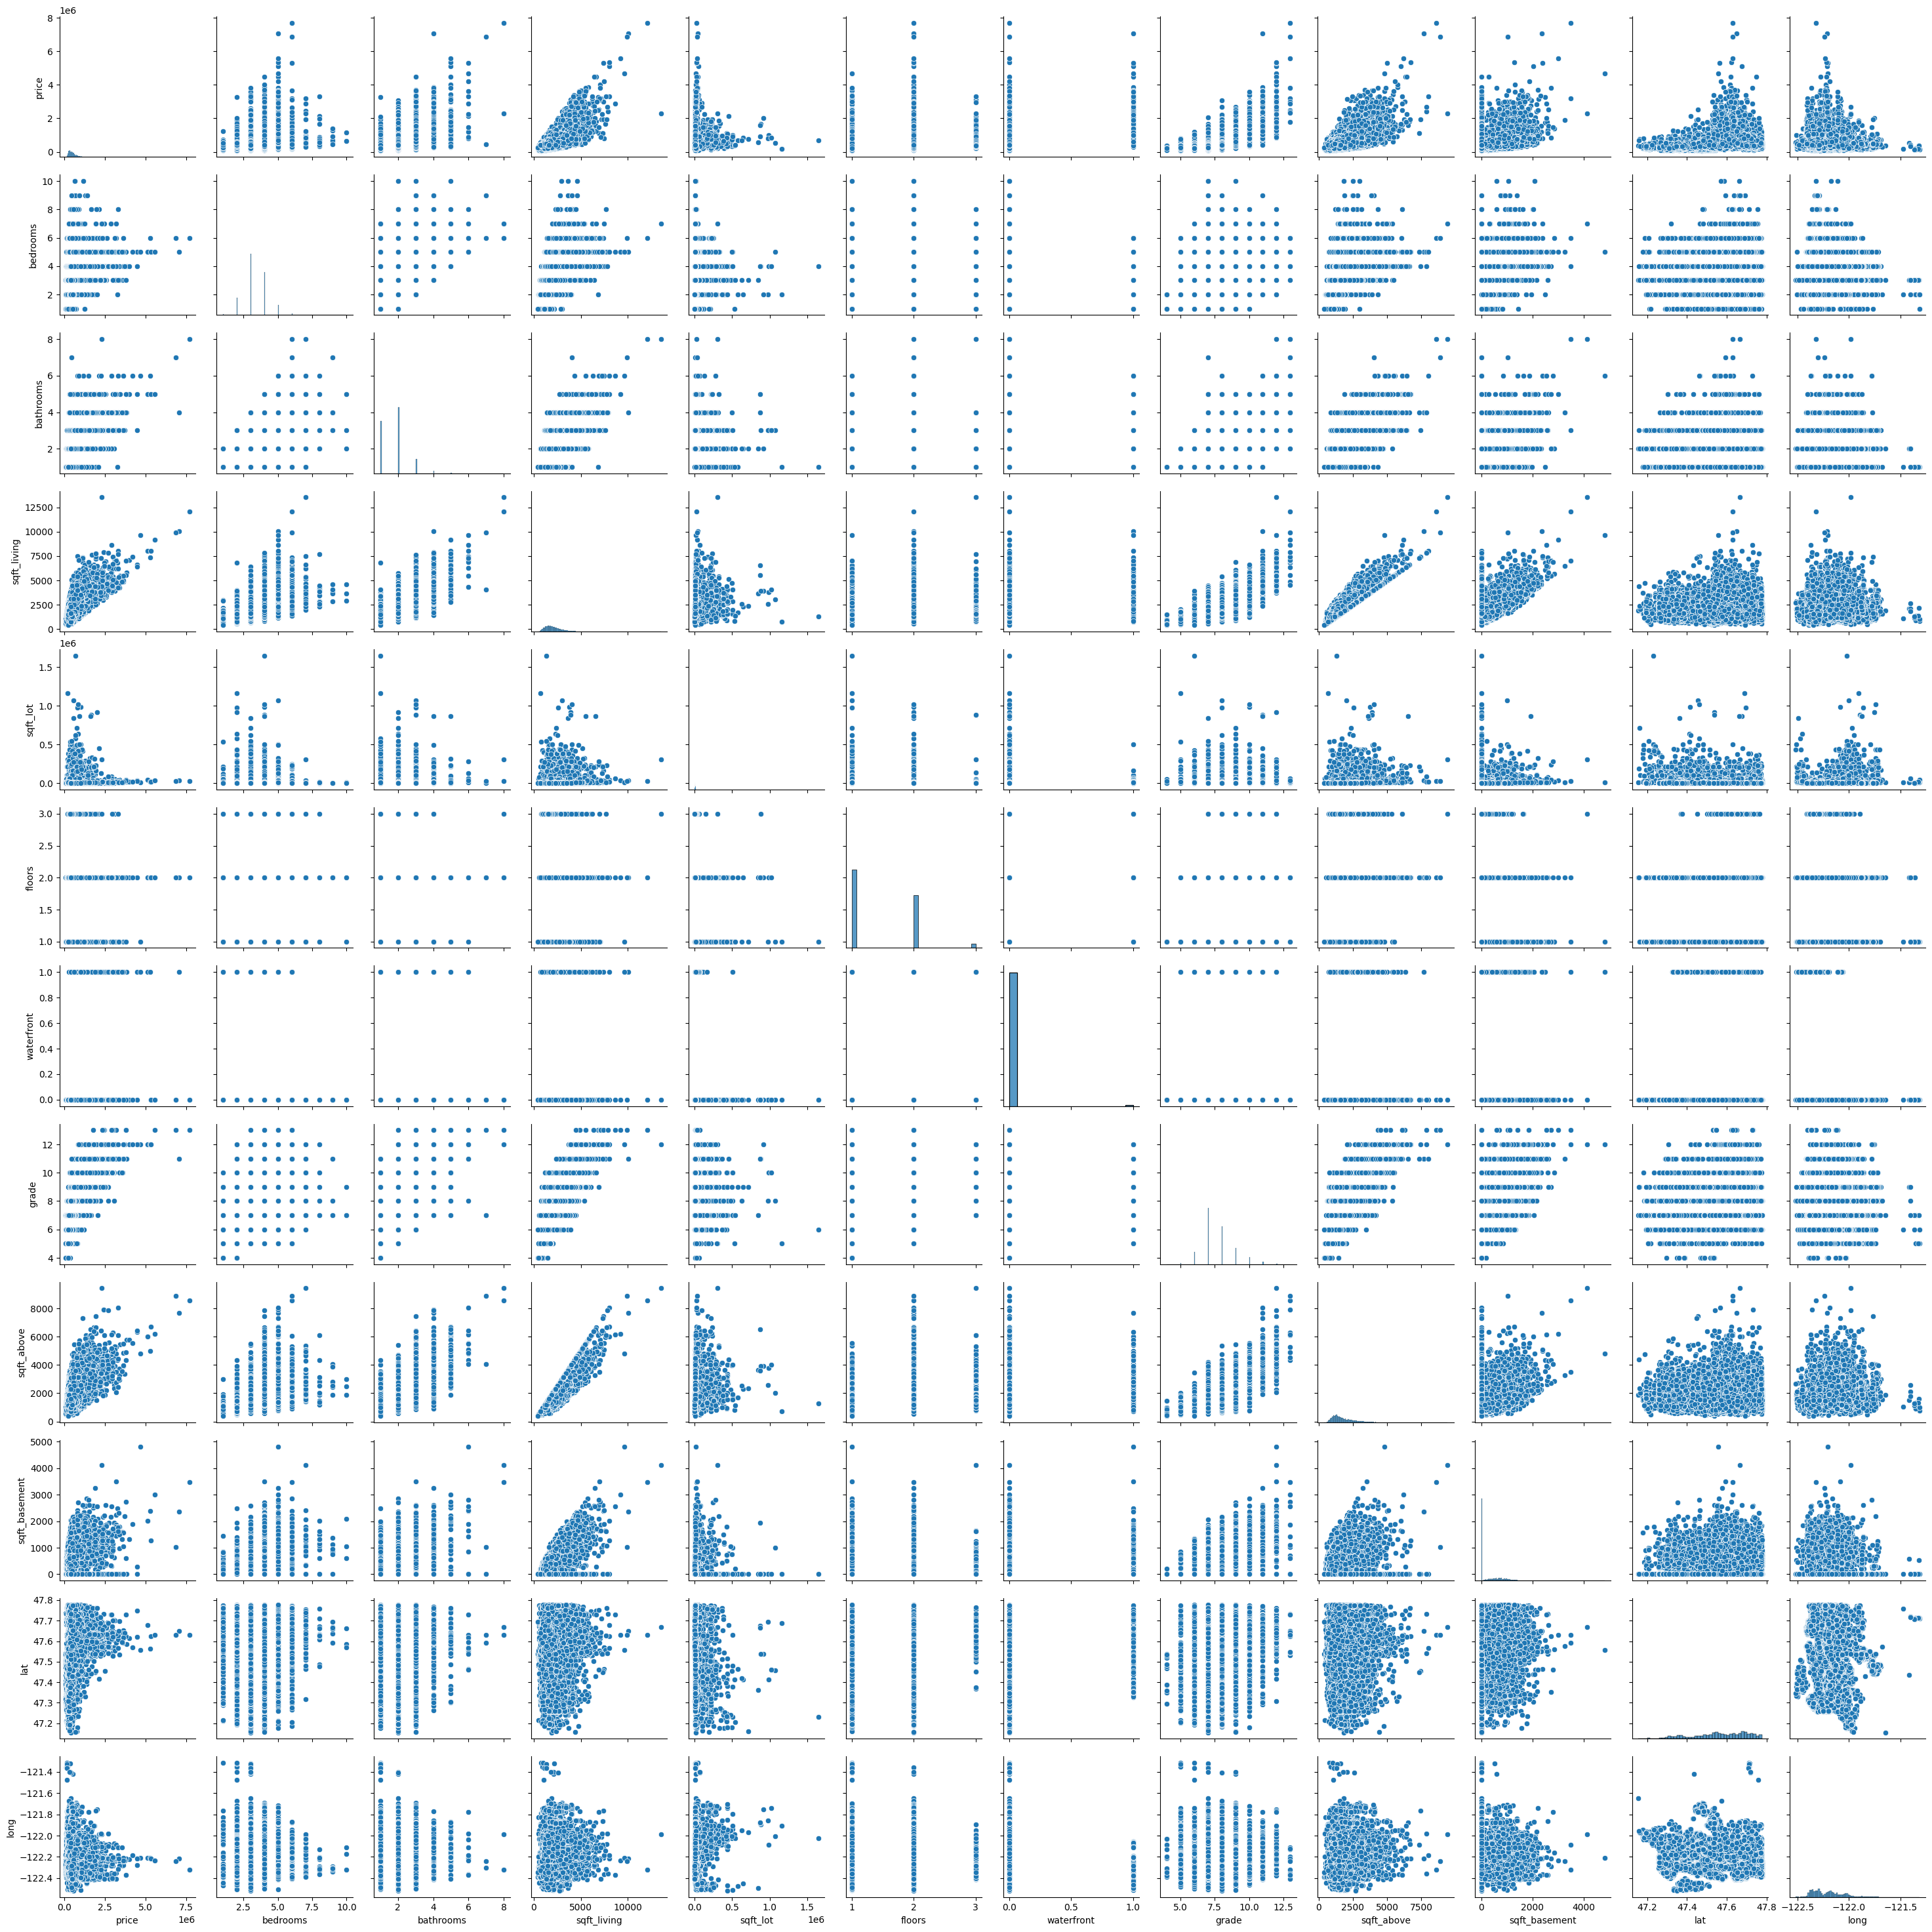

In [37]:
sns.pairplot(data=df)

In [31]:
drop_columns=['id','date','yr_built','yr_renovated','zipcode','view','condition','sqft_living15','sqft_lot15']
df.drop(drop_columns,axis=1,inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,7,1180,0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,7,2170,400,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,6,770,0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,7,1050,910,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,8,1680,0,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,8,1530,0,47.6993,-122.346
21609,400000.0,4,2.50,2310,5813,2.0,0,8,2310,0,47.5107,-122.362
21610,402101.0,2,0.75,1020,1350,2.0,0,7,1020,0,47.5944,-122.299
21611,400000.0,3,2.50,1600,2388,2.0,0,8,1600,0,47.5345,-122.069


In [40]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,lat,long
price,1.000000,0.314733,0.510671,0.701659,0.090092,0.236081,0.272513,0.668553,0.604748,0.323079,0.307068,0.022539
bedrooms,0.314733,1.000000,0.473370,0.591235,0.034156,0.159921,-0.003716,0.360853,0.490067,0.308642,-0.012242,0.138962
bathrooms,0.510671,0.473370,1.000000,0.697167,0.087152,0.485837,0.067653,0.603037,0.639412,0.249094,0.030344,0.183178
sqft_living,0.701659,0.591235,0.697167,1.000000,0.174168,0.351410,0.109636,0.761682,0.875828,0.434426,0.052023,0.243252
sqft_lot,0.090092,0.034156,0.087152,0.174168,1.000000,-0.008478,0.021454,0.115829,0.184792,0.015474,-0.085483,0.230610
floors,0.236081,0.159921,0.485837,0.351410,-0.008478,1.000000,0.022521,0.472275,0.516777,-0.237393,0.029218,0.160406
waterfront,0.272513,-0.003716,0.067653,0.109636,0.021454,0.022521,1.000000,0.089608,0.077207,0.082743,-0.011551,-0.037295
grade,0.668553,0.360853,0.603037,0.761682,0.115829,0.472275,0.089608,1.000000,0.755360,0.166181,0.113451,0.203666
sqft_above,0.604748,0.490067,0.639412,0.875828,0.184792,0.516777,0.077207,0.755360,1.000000,-0.054221,-0.001451,0.347373
sqft_basement,0.323079,0.308642,0.249094,0.434426,0.015474,-0.237393,0.082743,0.166181,-0.054221,1.000000,0.110342,-0.145015


In [41]:
drop_bedroom=np.where((df['bedrooms']>=11) | (df['bedrooms']<1)| (df['bathrooms']<1))

df.drop(index=drop_bedroom[0],inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,lat,long
0,221900.0,3.0,1.0,1180.0,5650.0,1.0,0.0,7.0,1180.0,0.0,47.5112,-122.257
1,538000.0,3.0,2.0,2570.0,7242.0,2.0,0.0,7.0,2170.0,400.0,47.7210,-122.319
2,180000.0,2.0,1.0,770.0,10000.0,1.0,0.0,6.0,770.0,0.0,47.7379,-122.233
3,604000.0,4.0,3.0,1960.0,5000.0,1.0,0.0,7.0,1050.0,910.0,47.5208,-122.393
4,510000.0,3.0,2.0,1680.0,8080.0,1.0,0.0,8.0,1680.0,0.0,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...
21606,1007500.0,4.0,3.0,3510.0,7200.0,2.0,0.0,9.0,2600.0,910.0,47.5537,-122.398
21607,475000.0,3.0,2.0,1310.0,1294.0,2.0,0.0,8.0,1180.0,130.0,47.5773,-122.409
21608,360000.0,3.0,2.0,1530.0,1131.0,3.0,0.0,8.0,1530.0,0.0,47.6993,-122.346
21609,400000.0,4.0,2.0,2310.0,5813.0,2.0,0.0,8.0,2310.0,0.0,47.5107,-122.362


In [33]:
df['bathrooms']=df['bathrooms'].apply(lambda x: int(x))
df['floors']=df['floors'].apply(lambda x: int(x))
df=df.astype('float')
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,lat,long
0,221900.0,3.0,1.0,1180.0,5650.0,1.0,0.0,7.0,1180.0,0.0,47.5112,-122.257
1,538000.0,3.0,2.0,2570.0,7242.0,2.0,0.0,7.0,2170.0,400.0,47.7210,-122.319
2,180000.0,2.0,1.0,770.0,10000.0,1.0,0.0,6.0,770.0,0.0,47.7379,-122.233
3,604000.0,4.0,3.0,1960.0,5000.0,1.0,0.0,7.0,1050.0,910.0,47.5208,-122.393
4,510000.0,3.0,2.0,1680.0,8080.0,1.0,0.0,8.0,1680.0,0.0,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...
21606,1007500.0,4.0,3.0,3510.0,7200.0,2.0,0.0,9.0,2600.0,910.0,47.5537,-122.398
21607,475000.0,3.0,2.0,1310.0,1294.0,2.0,0.0,8.0,1180.0,130.0,47.5773,-122.409
21608,360000.0,3.0,2.0,1530.0,1131.0,3.0,0.0,8.0,1530.0,0.0,47.6993,-122.346
21609,400000.0,4.0,2.0,2310.0,5813.0,2.0,0.0,8.0,2310.0,0.0,47.5107,-122.362


In [42]:
X=df.drop('price',axis=1)
y=df['price']
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,lat,long
0,3.0,1.0,1180.0,5650.0,1.0,0.0,7.0,1180.0,0.0,47.5112,-122.257
1,3.0,2.0,2570.0,7242.0,2.0,0.0,7.0,2170.0,400.0,47.7210,-122.319
2,2.0,1.0,770.0,10000.0,1.0,0.0,6.0,770.0,0.0,47.7379,-122.233
3,4.0,3.0,1960.0,5000.0,1.0,0.0,7.0,1050.0,910.0,47.5208,-122.393
4,3.0,2.0,1680.0,8080.0,1.0,0.0,8.0,1680.0,0.0,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...
21606,4.0,3.0,3510.0,7200.0,2.0,0.0,9.0,2600.0,910.0,47.5537,-122.398
21607,3.0,2.0,1310.0,1294.0,2.0,0.0,8.0,1180.0,130.0,47.5773,-122.409
21608,3.0,2.0,1530.0,1131.0,3.0,0.0,8.0,1530.0,0.0,47.6993,-122.346
21609,4.0,2.0,2310.0,5813.0,2.0,0.0,8.0,2310.0,0.0,47.5107,-122.362


In [50]:
y

0         221900.0
1         538000.0
2         180000.0
3         604000.0
4         510000.0
           ...    
21606    1007500.0
21607     475000.0
21608     360000.0
21609     400000.0
21611     400000.0
Name: price, Length: 21520, dtype: float64

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,shuffle=True)
X_train.shape,y_train.shape

((16140, 11), (16140,))

In [22]:
train_scale=StandardScaler().fit(X_train)
X_train=train_scale.transform(X_train)
X_test=train_scale.transform(X_test)
X_train

array([[-0.42254389,  1.70155733,  0.2593663 , ...,  0.70107859,
         0.2014903 , -0.58447121],
       [-0.42254389,  0.32613111, -0.33810721, ..., -0.65930509,
        -0.76543563,  0.44902934],
       [-0.42254389,  0.32613111,  1.08496607, ..., -0.65930509,
        -0.07929981,  0.66998463],
       ...,
       [-1.53617199, -1.04929511, -1.02248597, ..., -0.34188223,
        -0.02530171, -0.42766423],
       [-0.42254389,  0.32613111,  1.4869028 , ..., -0.65930509,
        -0.5760823 ,  0.17818092],
       [-2.64980008, -1.04929511, -1.50046479, ..., -0.65930509,
         0.01357692, -0.49894013]])

In [23]:
X_train=pd.DataFrame(data=X_train,columns=X.columns)
X_test=pd.DataFrame(data=X_test,columns=X.columns)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,lat,long
0,-0.422544,1.701557,0.259366,-0.262827,-0.820782,-0.083593,1.978639,-0.084426,0.701079,0.201490,-0.584471
1,-0.422544,0.326131,-0.338107,-0.112544,-0.820782,-0.083593,0.274927,-0.024511,-0.659305,-0.765436,0.449029
2,-0.422544,0.326131,1.084966,-0.099736,0.991698,-0.083593,1.978639,1.545270,-0.659305,-0.079300,0.669985
3,0.691084,0.326131,1.693303,-0.192749,0.991698,-0.083593,1.126783,0.874219,1.880078,0.830748,-0.441919
4,0.691084,0.326131,1.117556,0.443115,0.991698,-0.083593,1.126783,1.581220,-0.659305,-1.563168,1.304340
...,...,...,...,...,...,...,...,...,...,...,...
16135,-1.536172,0.326131,-0.631412,-0.185746,0.991698,-0.083593,-0.576929,-0.348053,-0.659305,0.476521,1.104768
16136,-0.422544,0.326131,0.161598,-0.206520,0.991698,-0.083593,-0.576929,0.526710,-0.659305,-0.177216,2.366351
16137,-1.536172,-1.049295,-1.022486,-0.196204,-0.820782,-0.083593,-0.576929,-0.947206,-0.341882,-0.025302,-0.427664
16138,-0.422544,0.326131,1.486903,-0.201961,0.991698,-0.083593,-0.576929,1.988644,-0.659305,-0.576082,0.178181


In [24]:
label_scale=StandardScaler().fit(y_train.values.reshape(-1,1))
y_train=label_scale.transform(y_train.values.reshape(-1,1))
y_test=label_scale.transform(y_test.values.reshape(-1,1))

y_train=pd.Series(y_train.flatten())
y_test=pd.Series(y_test.flatten())
y_train

0        0.768748
1       -0.650626
2        1.070972
3        1.804945
4        0.199379
           ...   
16135   -0.266100
16136   -0.293084
16137   -0.313323
16138   -0.199988
16139   -0.765310
Length: 16140, dtype: float64

In [12]:
Rf=Pipeline([
    ("Random Forest Regressor",RandomForestRegressor())
    ])



knn=Pipeline([
    ("Knn",KNeighborsRegressor())
    ])

pipe=[Rf,knn]
dct={0:'KNeighbor Regressor',1:'Random Forest Regressor'}

for model in pipe:
    model.fit(X_train,y_train)

for i,model in enumerate(pipe):
    print(f"{dct[i]} Train Accuracy : {model.score(X_train,y_train)}")
    print(f"{dct[i]} Test Accuracy : {model.score(X_test,y_test)}")
    print()

KNeighbor Regressor Train Accuracy : 0.9811283600034163
KNeighbor Regressor Test Accuracy : 0.869194847106133

Random Forest Regressor Train Accuracy : 0.861344028038324
Random Forest Regressor Test Accuracy : 0.7969940194700569

